In [14]:
from   fluids               import *
from   thermo               import Mixture
from   scipy.constants      import atmosphere, zero_Celsius, mmHg, g
import scipy                as     sci
import uncertainties 
# from   uncertainties        import *
from   uncertainties.unumpy import *
# import uncertainties        as     unumpy
from   numpy                import *
from   pandas               import *
import pandas               as pd
import matplotlib.pyplot    as plt
import numpy                as np
import uncertainties        as uc
import uncertainties.unumpy as ucu
import pwlf                             # amb aquest packet permet la interpolació lineal
# import pickle        
import math                             # amb aquest packet podem transportar informació 
from sympy import symbols, solve

In [15]:
PvsMu1         = pd.read_csv ( 'datameu.csv' , sep = ';' )
PvsMu2         = pd.read_csv ( 'datameu1.csv' , sep = ';' )
PvsMu3         = pd.read_csv ( 'datameu2.csv' , sep = ';' )

In [20]:
PvsMu = pd.concat([PvsMu1,PvsMu2,PvsMu3])

# print(PvsTime)
PvsMu       = PvsMu.sort_values( by   = 'p_vess')
PvsMu       = PvsMu.reset_index( drop = 'True')       #reset index and drop ?
PvsMu['mu'] = PvsMu.mdot/PvsMu.mdot_p
PvsMu['pressure'] = atmosphere- PvsMu.p_vess

# print(PvsMu)
PvsMu.rename(columns = {'p_vess': 'pressure_rel', 'p_vess_err': 'pressure_err'}, inplace = True )
PvsMu.rename(columns = {'p_vess_dim': 'pressure_adim', 'p_vess_err_dim': 'pressure_adim_err'}, inplace = True)
PvsMu.rename(columns = {'mdot': 'mdot_s', 'mdot_err': 'mdot_s_err'}, inplace = True)

# The code inplace = False means the result would be stored in a new DataFrame instead of the original one
PvsMu.to_csv(path_or_buf='PvsMu.csv', sep=';')

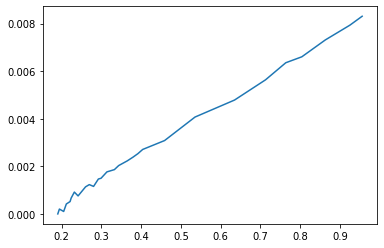

In [31]:
plt.plot(PvsMu.pressure_adim,PvsMu.mdot_s)

Text(0.5, 0, 'prova')

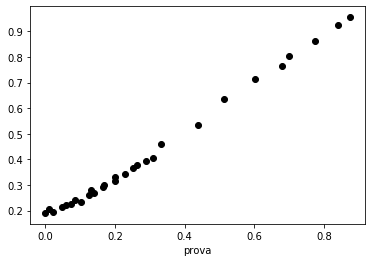

In [34]:
fig = plt.figure()
fig1 = fig.add_subplot(1,1,1)
fig1.errorbar(x=PvsMu.mu,y= PvsMu.pressure_adim,\
#               xerr=0, yerr=0, \
              xerr=PvsMu.mdot_s_err,yerr=PvsMu.pressure_adim_err,\
              fmt='ko',label='m' )
plt.xlabel("prova")

In [28]:
x = PvsMu.mu
y = PvsMu.pressure_adim

my_pwlf   = pwlf.PiecewiseLinFit( x , y )  #inicia aquí la sequencia del piecewiselinealfit 
res       = my_pwlf.fit( 2 )               # 
# my_pwlf.slopes
xHat      = np.linspace(min(x), max(x), num=100)   #aqui crea els valors ben separats entre ells
yHat      = my_pwlf.predict(xHat) 

graph = DataFrame()
graph['p'] = xHat
graph['mu'] = yHat
graph.to_csv(path_or_buf='graph.csv', sep=';')

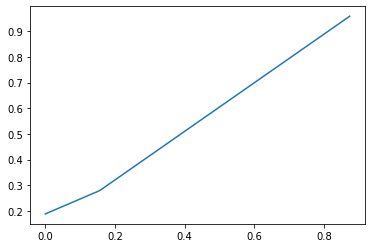

In [29]:
plt.plot(xHat,yHat)